In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd

mpl.use('nbagg')
import matplotlib.pyplot as plt
plt.ioff()

import tensorflow as tf

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("x_test", x_test.shape)
print("y_test", y_test.shape)
print("x_train", x_train.shape)
print("y_train", y_train.shape)

x_test (10000, 28, 28)
y_test (10000,)
x_train (60000, 28, 28)
y_train (60000,)


x_test (10000, 28, 28)
y_test (10000, 10)
x_train (60000, 28, 28)
y_train (60000, 10)


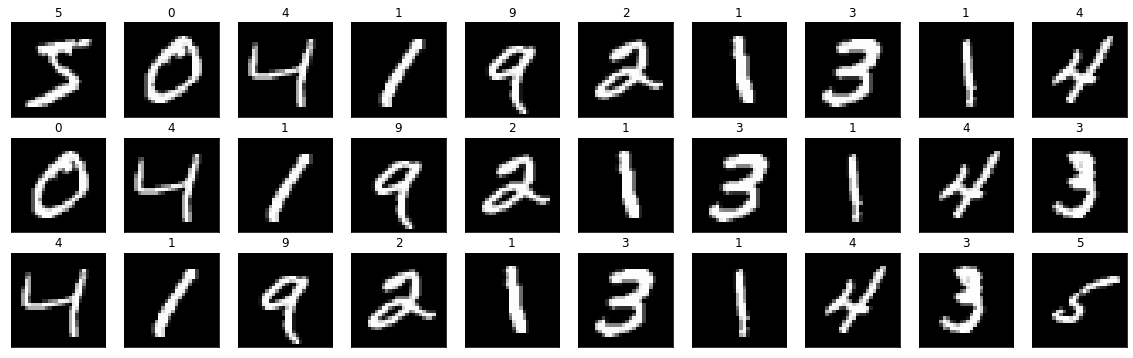

In [21]:
#Normalisation
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/ 255.0

#Getting labels and conversion to one hot label
labels = [0,1,2,3,4,5,6,7,8,9]
y_train = tf.one_hot(y_train, len(labels)).numpy()
y_test = tf.one_hot(y_test, len(labels)).numpy()

#Dimensions
print("x_test", x_test.shape)
print("y_test", y_test.shape)
print("x_train", x_train.shape)
print("y_train", y_train.shape)

fig,axes = plt.subplots(3,10,figsize=[20,6])

for i, j in zip(list(np.repeat(list(range(3)),10)), list(range(10))*3):
  axes[i][j].imshow(x_train[i+j], cmap='gray', vmin=0, vmax=1)
  axes[i][j].set(xticks=(), yticks=(), title=str(y_train[i+j].argmax()))
  
fig.show()

In [27]:
#Creating the model
input_layer = tf.keras.layers.Input(shape=tuple(x_train.shape[1:]), name = "Inpur_Layer")
LSTM_layer_1 = tf.keras.layers.LSTM(units=50, return_sequences= True, name = "LSTM_Layer_1")(input_layer)
LSTM_layer_2 = tf.keras.layers.LSTM(units=50, name="LSTM_layer_2")(LSTM_layer_1)
output_layer = tf.keras.layers.Dense(units=10, activation='softmax', name="Dense_Output_Layer")(LSTM_layer_2)

model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inpur_Layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 LSTM_Layer_1 (LSTM)         (None, 28, 50)            15800     
                                                                 
 LSTM_layer_2 (LSTM)         (None, 50)                20200     
                                                                 
 Dense_Output_Layer (Dense)  (None, 10)                510       
                                                                 
Total params: 36,510
Trainable params: 36,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)
#Train the model
epochs = 25

history = model.fit(
    x=x_train,
    y=y_train,
    validation_data = (x_test, y_test),
    epochs=epochs,
    verbose=2
)

Epoch 1/25
1875/1875 - 48s - loss: 0.4056 - accuracy: 0.8698 - val_loss: 0.1425 - val_accuracy: 0.9568 - 48s/epoch - 25ms/step
Epoch 2/25
1875/1875 - 44s - loss: 0.1212 - accuracy: 0.9636 - val_loss: 0.0974 - val_accuracy: 0.9715 - 44s/epoch - 24ms/step
Epoch 3/25
1875/1875 - 43s - loss: 0.0834 - accuracy: 0.9751 - val_loss: 0.0717 - val_accuracy: 0.9775 - 43s/epoch - 23ms/step
Epoch 4/25
1875/1875 - 43s - loss: 0.0660 - accuracy: 0.9806 - val_loss: 0.0679 - val_accuracy: 0.9799 - 43s/epoch - 23ms/step
Epoch 5/25
1875/1875 - 43s - loss: 0.0531 - accuracy: 0.9844 - val_loss: 0.0673 - val_accuracy: 0.9799 - 43s/epoch - 23ms/step
Epoch 6/25
1875/1875 - 44s - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0502 - val_accuracy: 0.9854 - 44s/epoch - 23ms/step
Epoch 7/25
1875/1875 - 44s - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0494 - val_accuracy: 0.9835 - 44s/epoch - 23ms/step
Epoch 8/25
1875/1875 - 43s - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0528 - val_accuracy: 0.9831 - 43s/ep

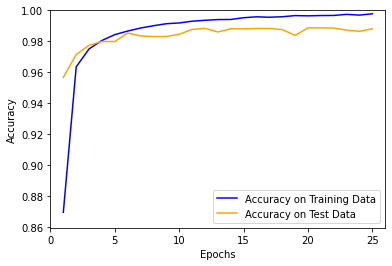

In [30]:
#Accuracy v/s epoch graph
ax=plt.subplot()
plt.xlim(0,epochs+1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

ax.set_ylim(bottom = min(history.history['accuracy'] + history.history['val_accuracy']) - 0.01)
training_acc, = ax.plot(range(1,epochs+1), history.history['accuracy'], color="blue")
test_acc, = ax.plot(range (1,epochs+1), history.history['val_accuracy'], color="orange")

plt.legend([training_acc, test_acc], ["Accuracy on Training Data", "Accuracy on Test Data"])

plt.show()

The prediction is 2, and the value is 2


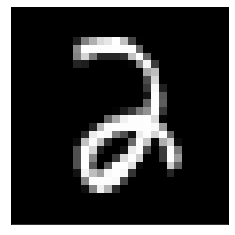

In [31]:
# Test the model for a random image in the test data

import random

img_idx = random.randint (0, 9999)

prediction = model.predict(x_test[img_idx].reshape(1, *x_test.shape[1:])).argmax()

print("The prediction is ", prediction, ", and the value is ", y_test[img_idx].argmax(), sep='')

ax = plt.subplot()
ax.imshow(x_test[img_idx], cmap='gray', vmin=0, vmax=1)
ax.set(xticks = [], yticks =[])
plt.show()